# Trabalho 1 - Filtros Não-Lineares

O trabalho 1 da disciplina de *Processamento Digital de Imagens* consiste em implementar os filtros *média geométrica* e de *mediana* em imagens.

## Integrantes

*Graduandos da Universidade Federal de São Carlos.*

- **Felipe Tavoni**

- **Gabriel Rodrigues Malaquias**

- **Lucas Cruz do Reis**

- **Renan Bobadilla Morelli**

Os **filtros não-lineares** se diferem de **filtros lineares** pois têm como característica principal o uso de alguma função não-linear ao processar as imagens, ou seja, qualquer filtro que não se apresente como uma relação ponderada dos pixels. Por isso, acabam sendo mais custosos computacionalmente.

Filtros não-lineares são comumente utilizados para alterar uma imagem sem diminuir sua resolução, intencionados a minimizar/realçar ruídos, além de suavizar/realçar bordas de objetos.

A seguir, estabelecemos um filtro aritmético para comparações com os filtros não-lineares.

## Importação das bibliotecas necessárias

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

## Implementação do filtro aritmético

In [2]:
def filtro_aritmetico(img_path, filter_size):
    """
    Desc.: Implemeta o filtro de média geométrica.
    I: O caminho de uma imagem(img_path), o tamanho do filtro(filter_size)
    O: A imagem X resultante da aplicação do filtro.
    """
    filter_size_ext = filter_size // 2

    img = plt.imread(img_path)
    num_rows, num_cols = img.shape[:2]
    dim = img.shape[2] if (len(img.shape) == 3) else 1

    # Extendendo a borda da imagem utilizando a técnica "wraparound".
    img_ext = np.pad(img, (filter_size_ext, filter_size_ext), mode='wrap')

    # Essa variável armazenará a imagem resultante. Não deve ser float64 (padrão), mas sim uint8...
    img_filtered = np.zeros((num_rows, num_cols, dim), dtype=np.uint8)

    # Para imagens coloridas, temos de calcular a suavização para os 3 níveis RGB, senão a trasparência...
    if len(img.shape) >= 3:
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mean = np.mean(img_ext[row:row + filter_size,
                                      col:col + filter_size, i],
                                      dtype=np.longdouble)
                    img_filtered[row, col, i] = mean

    # Já em caso de imagens monocromáticas, uma única dimensão deve ser processada.
    else:
        # Processo idêntico ao anterior, no entanto, adaptado para apenas uma dimensão.
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mean = np.mean(img_ext[row:row + filter_size,
                                      col:col + filter_size],
                                      dtype=np.longdouble)
                    img_filtered[row, col] = mean

    return img_filtered

# Filtro geométrico

O filtro de média geométrica consiste em implementar um filtro que calcula o valor do produto dos vizinhos, conforme definido pelo filtro, e então extrai a n-ésima raíz do conjunto, conforme a função abaixo.

<img src="files/images/MediaGeom.png" alt="Média Geométrica" width="45%" style="display: block; margin: auto;"> 

## Implementando o filtro geométrico

In [3]:
def filtro_geometrico(img_path, filter_size):
    """
    Desc.: Implemeta o filtro de média geométrica.
    I: O caminho de uma imagem(img_path), o tamanho do filtro(filter_size)
    O: A imagem X resultante da aplicação do filtro.
    """
    filter_size_ext = filter_size // 2

    img = plt.imread(img_path)
    num_rows, num_cols = img.shape[:2]
    dim = img.shape[2] if (len(img.shape) == 3) else 1

    # Extendendo a borda da imagem utilizando a técnica "wraparound".
    img_ext = np.pad(img, (filter_size_ext, filter_size_ext), mode='wrap')

    # Essa variável armazenará a imagem resultante. Não deve ser float64 (padrão), mas sim uint8...
    img_filtered = np.zeros((num_rows, num_cols, dim), dtype=np.uint8)

    # O coeficiente da raíz da média geométrica
    exp_root = 1 / (filter_size ** 2)

    # Para imagens coloridas, temos de calcular a suavização para os 3 níveis RGB, senão a trasparência...
    if len(img.shape) >= 3:
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mult = np.product(img_ext[row:row + filter_size,
                                      col:col + filter_size, i],
                                      dtype=np.longdouble)
                    img_filtered[row, col, i] = int(mult**exp_root)

    # Já em caso de imagens monocromáticas, uma única dimensão deve ser processada.
    else:
        # Processo idêntico ao anterior, no entanto, adaptado para apenas uma dimensão.
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mult = np.product(img_ext[row:row + filter_size,
                                      col:col + filter_size],
                                      dtype=np.longdouble)
                    img_filtered[row, col] = int(mult**exp_root)

    return img_filtered

### Resultados da aplicação do filtro geométrico

O filtro de média geométrica obtém uma suavização próxima à aplicação do filtro de média aritmética, mas tende a perder menos detalhes da imagem no processo.

Assim, considerando uma imagem ruidosa, colorida (4 canais) e monocromáticas (1 canal) calcularemos a média aritmética e a média geométrica, comparando-as no final.

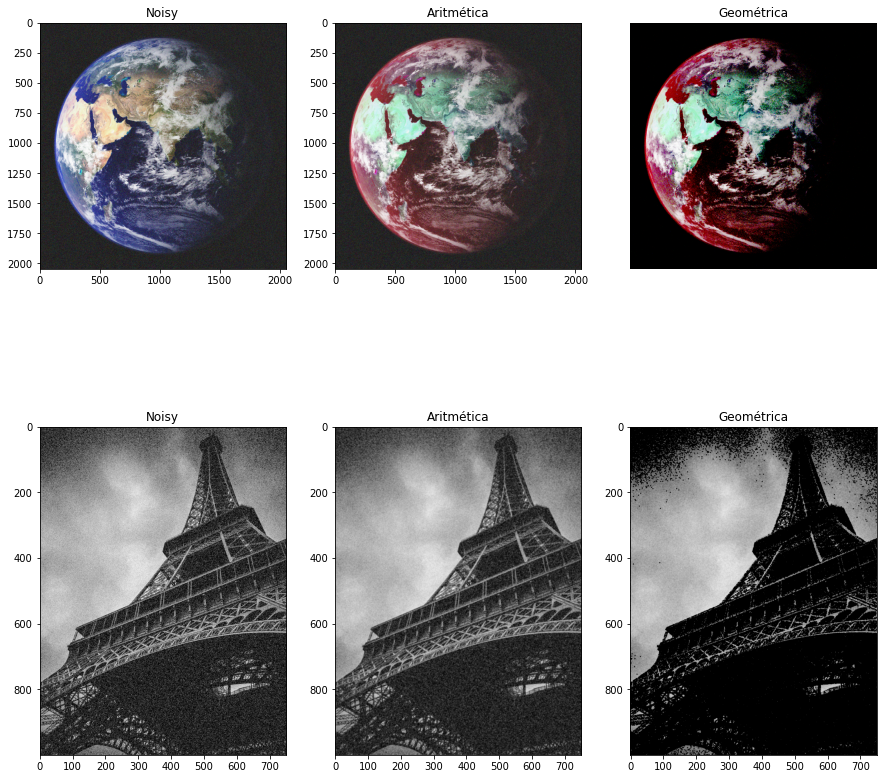

In [4]:
# Para imagens coloridas
# Abrindo a imagem original para comparação
img_orig = plt.imread("images/NoisyEarth.tiff")
# Filtrando a imagem desejada com um filtro 3x3, tanto aritméticamente quanto geométricamente.
img_filtered_arit = filtro_aritmetico("images/NoisyEarth.tiff", 3)
img_filtered_geom = filtro_geometrico("images/NoisyEarth.tiff", 3)

# Exibindo os resultados.
plt.figure(figsize=[15, 15])

plt.subplot(2, 3, 1)
plt.title('Noisy')
plt.imshow(img_orig, vmin=0, vmax=255)
plt.subplot(2, 3, 2)
plt.title('Aritmética')
plt.imshow(img_filtered_arit, vmin=0, vmax=255)
plt.subplot(2, 3, 3)
plt.title('Geométrica')
plt.imshow(img_filtered_geom, vmin=0, vmax=255)

# Para imagens monocromáticas
# Abrindo a imagem original para comparação
img_orig = plt.imread("images/NoisyEiffel.tiff")
# Filtrando a imagem desejada com um filtro 3x3.
img_filtered_arit = filtro_aritmetico("images/NoisyEiffel.tiff", 3)
img_filtered_geom = filtro_geometrico("images/NoisyEiffel.tiff", 3)

# Exibindo os resultados.
plt.subplot(2, 3, 4)
plt.title('Noisy')
plt.imshow(img_orig, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 3, 5)
plt.title('Aritmética')
plt.imshow(img_filtered_arit, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 3, 6)
plt.title('Geométrica')
plt.imshow(img_filtered_geom, cmap='gray', vmin=0, vmax=255)


### Resultados com 4 canais

A imagem do planeta Terra conta com um ruído "sal e pimenta", com um aspecto granulado e com intensidade mediana. Assim, o resultado da média aritmética suaviza a imagem, como pode ser observado pela mudança de cor - dado que alguns canais são mais afetados que outros - mas essa suavização não é suficiente para remover o ruído. Já na filtragem geométrica, o aspecto granulado foi completamente removido da imagem, mantendo detalhes do planeta íntegros.

### Resultados com 1 canal

Aqui, o resultado se parece com o anterior. Novamente, o filtro de média não é capaz de remover completamente o ruído, enquanto o filtro de média geométrica remove o ruído.

### Efeitos colaterais

Em ambos os resultados, os filtro geométrico remove o ruído de fato, mas no entanto, apresenta um efeito colateral. Como visto, na imagem colorida ele altera a cor do planeta. Isso acontece pois as operações sobre os canais são independentes, dessa forma, pode acontecer de um canal ser mais intenso que outro. Além disso, na imagem monocromática, observa-se uma intensificação da cor preta na imagem. Como a operação é de produtório, se um pixel preto (de valor 0) estiver presente na vizinhança, ele ser torna preto também!

# Filtro de mediana

O filtro da mediana, por sua vez, troca o valor do pixel pelo valor médio (mediana) de intensidade presente nos pixes da vizinhança, definido pelo filtro. Pode ser definida como:

<img src="files/images/Mediana.png" alt="Média Geométrica" width="45%" style="display: block; margin: auto;"> 

## Implementando o filtro de mediana

In [5]:
def filtro_mediana(img_path, filter_size):
    """
    Desc.: Implemeta o filtro de média com base na mediana.
    I: O caminho de uma imagem(img_path), o tamanho do filtro(filter_size)
    O: A imagem X resultante da aplicação do filtro.
    """
    filter_size_ext = filter_size // 2

    img = plt.imread(img_path)
    num_rows, num_cols = img.shape[:2]
    dim = img.shape[2] if (len(img.shape) == 3) else 1

    # Extendendo a borda da imagem utilizando a técnica "wraparound".
    img_ext = np.pad(img, (filter_size_ext, filter_size_ext), mode='wrap')

    # Essa variável armazenará a imagem resultante. Não deve ser float64 (padrão), mas sim uint8...
    img_filtered = np.zeros((num_rows, num_cols, dim), dtype=np.uint8)

    # Para imagens coloridas, temos de calcular a suavização para os 3 níveis RGB, senão a trasparência...
    if len(img.shape) >= 3:
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    img_filtered[row, col, i] = int(np.median(img_ext[row:row + filter_size,
                                                                col:col + filter_size, i]))

    # Já em caso de imagens monocromáticas, uma única dimensão deve ser processada.
    else:
        # Processo idêntico ao anterior, no entanto, adaptado para apenas uma dimensão.
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    img_filtered[row, col, i] = int(np.median(img_ext[row:row + filter_size,
                                                                col:col + filter_size]))

    return img_filtered

### Resultados da aplicação do filtro de mediana

Os filtros de mediana são populares para certos tipos de ruídos, pois apresentam uma capacidade excelente para a redução de ruídos, com menos "embaçamento" quando comparados a filtros lineares de tamanhos equivalentes. São bem efetivos na presença de ruídos de impulso unipolar e bipolar

Novamente, considerando uma imagem ruidosa, colorida (4 canais) e monocromáticas (1 canal) calcularemos a média aritmética e a mediana, comparando-as no final.

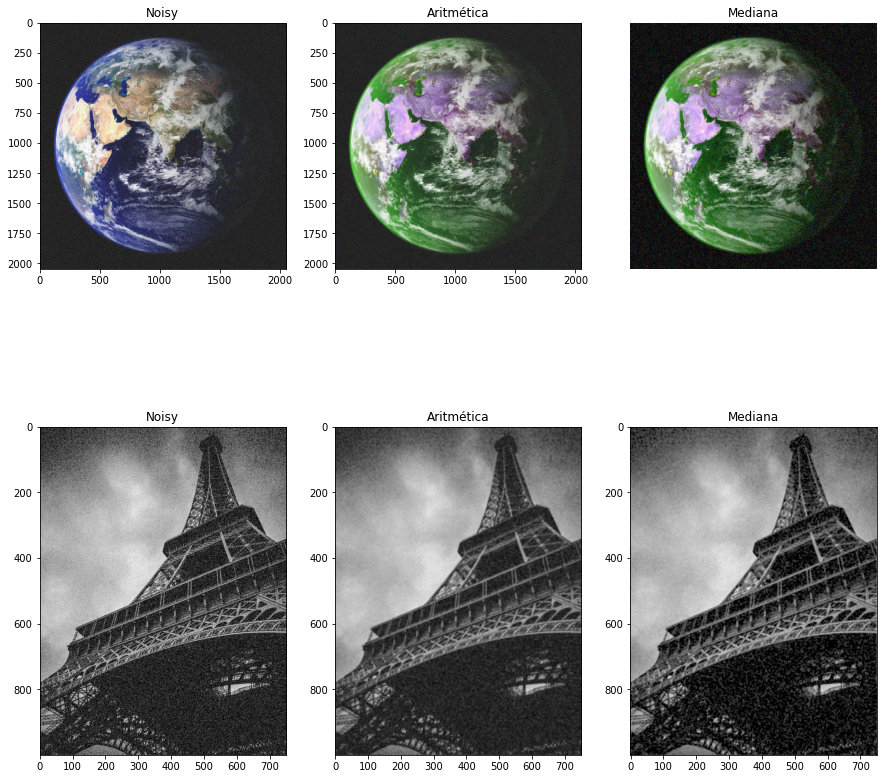

In [6]:
# Para imagens coloridas
# Abrindo a imagem original para comparação
img_orig = plt.imread("images/NoisyEarth.tiff")
# Filtrando a imagem desejada com um filtro 3x3.
img_filtered_arit = filtro_aritmetico("images/NoisyEarth.tiff", 5)
img_filtered_mediana = filtro_mediana("images/NoisyEarth.tiff", 5)

# Exibindo os resultados.
plt.figure(figsize=[15, 15])

plt.subplot(2, 3, 1)
plt.title('Noisy')
plt.imshow(img_orig, vmin=0, vmax=255)
plt.subplot(2, 3, 2)
plt.title('Aritmética')
plt.imshow(img_filtered_arit, vmin=0, vmax=255)
plt.subplot(2, 3, 3)
plt.title('Mediana')
plt.imshow(img_filtered_mediana, vmin=0, vmax=255)

# Para imagens monocromáticas
# Abrindo a imagem original para comparação
img_orig = plt.imread("images/NoisyEiffel.tiff")
# Filtrando a imagem desejada com um filtro 3x3.
img_filtered_arit = filtro_aritmetico("images/NoisyEiffel.tiff", 5)
img_filtered_mediana = filtro_mediana("images/NoisyEiffel.tiff", 5)

# Exibindo os resultados.
plt.subplot(2, 3, 4)
plt.title('Noisy')
plt.imshow(img_orig, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 3, 5)
plt.title('Aritmética')
plt.imshow(img_filtered_arit, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 3, 6)
plt.title('Mediana')
plt.imshow(img_filtered_mediana, cmap='gray', vmin=0, vmax=255)

### Resultados com 4 canais

Com imagens de 4 canais, observamos uma diminuição no ruído, no entanto não totalmente. Aqui, o tamanho do filtro influencia bastante no resultado dessa suavização. Isso porque a imagem seleciona o valor intermediário, então se a parcela de ruído for alta nessa grade do filtro, o resultado não será o desejado.

### Resultados com 1 canal

Em imagens monocromáticas, o mesmo ocorre. Aqui, observa-se melhor ao analisar a região inferior da torre, menos granulada que um filtro de média aritmética.

### Efeitos colaterais

Novamente aqui observa-se a presença de efeitos colaterais. Em imagens coloridas, há uma alteração nas cores como explicado anteriormente.